Reference: https://medium.com/analytics-vidhya/python-exploratory-data-analysis-eda-on-nyc-airbnb-cbeabd622e30

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nyc_df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
%matplotlib inline

In [5]:
nyc_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Drop the unnecessary columns

In [6]:
nyc_df.drop(['id','name', 'host_name', 'last_review'], axis=1, inplace=True)
print(nyc_df.head())

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

## Replace whatever NaN we have, with zero

In [7]:
nyc_df.reviews_per_month.fillna(0, inplace=True)
print(nyc_df.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


## Now, we explore each of the data attributes one by one

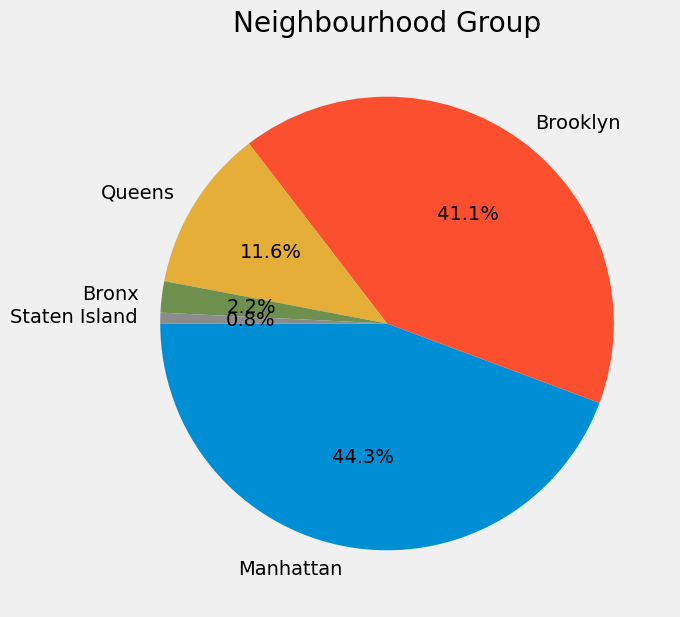

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


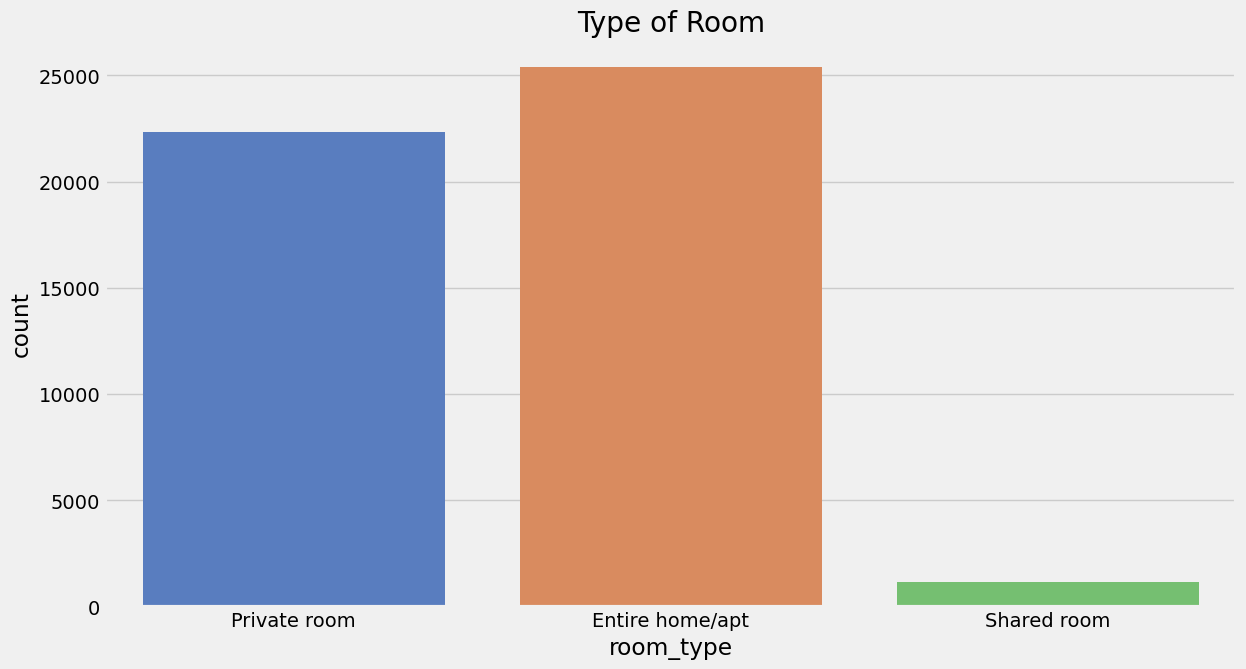

In [12]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(nyc_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


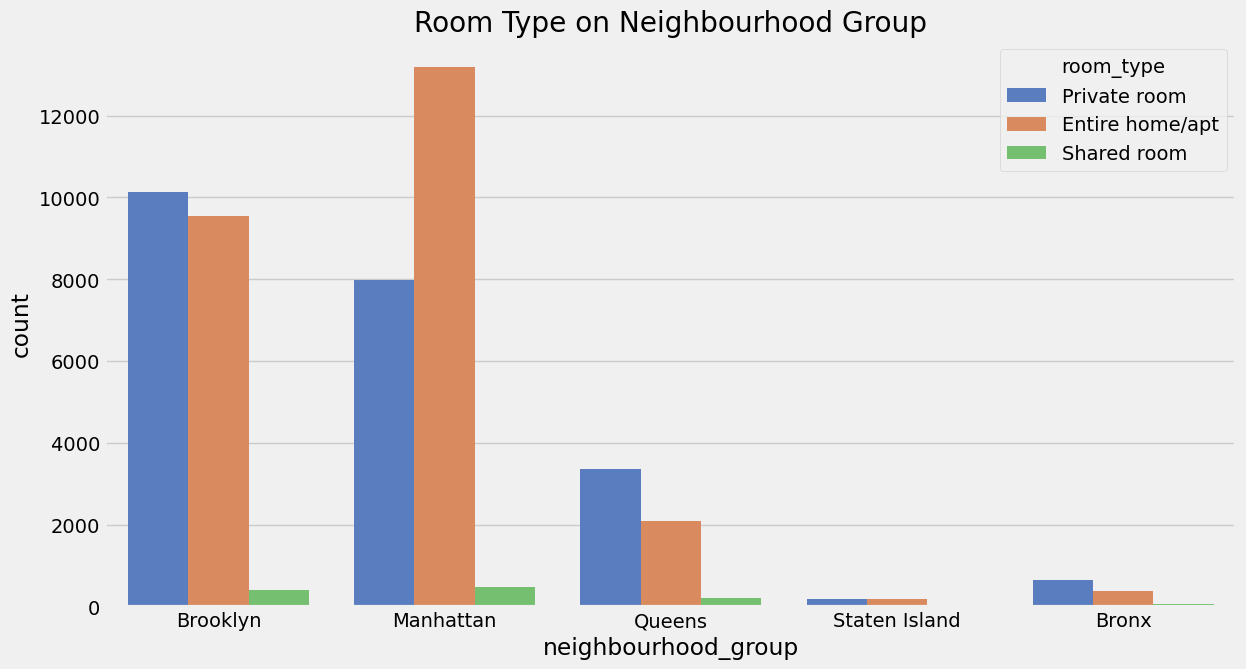

In [13]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(nyc_df.neighbourhood_group,hue=nyc_df.room_type, palette="muted")
plt.show()

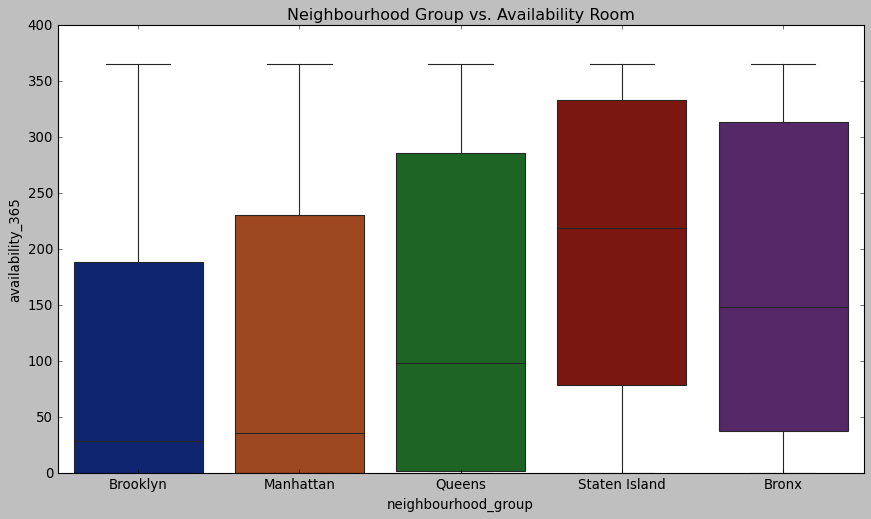

In [14]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=nyc_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

<Figure size 1040x560 with 0 Axes>

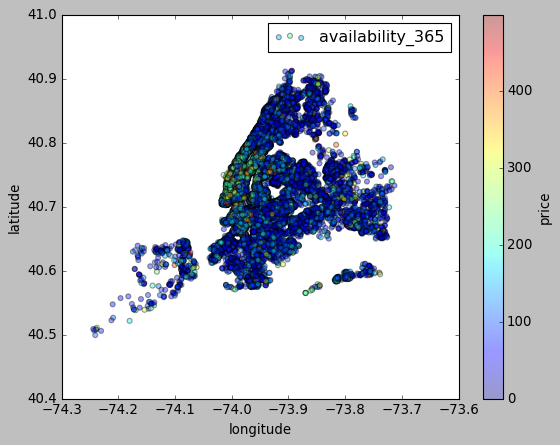

In [19]:
plt.figure(figsize=(13,7))

ax=nyc_df[nyc_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

The information we got from the graph above is red color dots are the rooms with a higher price. Also, we can see that the Manhattan region has a more expensive room price.

## Correlation:

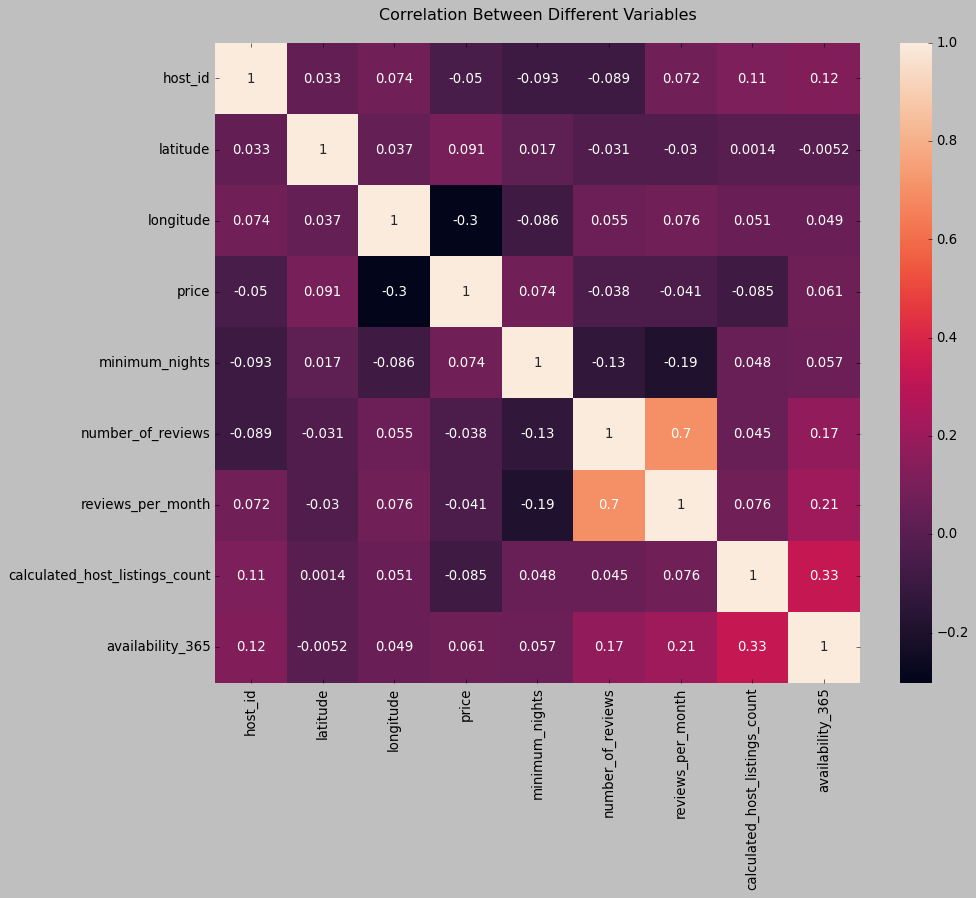

In [20]:
corr = nyc_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()